<a href="https://colab.research.google.com/github/doliq/PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diwa Arsyad Atthoriq
TI-3C

2141720222

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:

def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

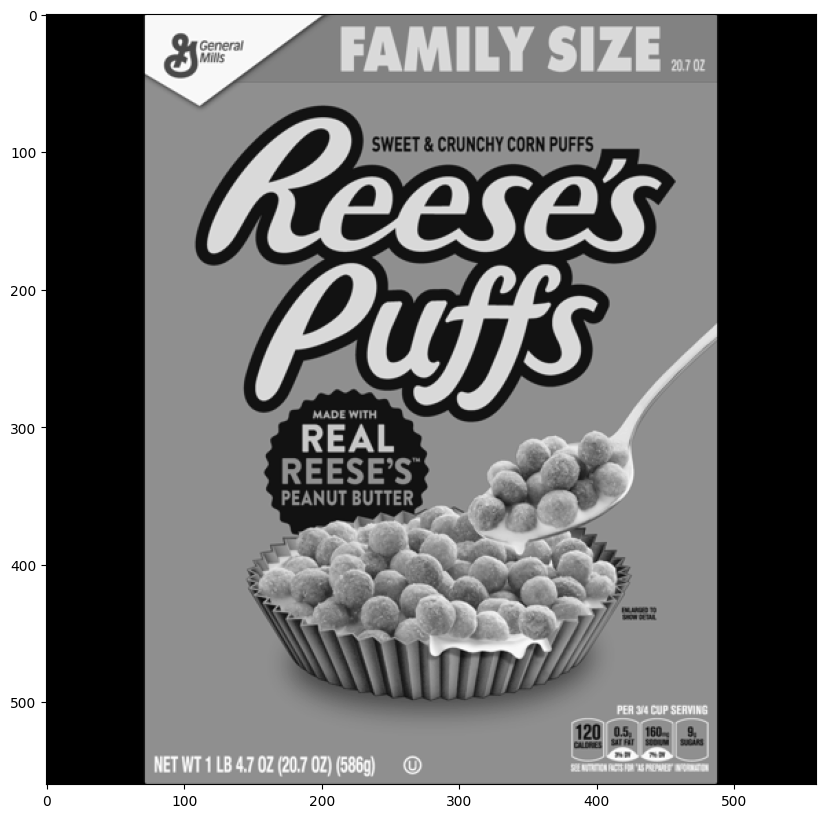

In [4]:
reeses = cv.imread('/content/drive/MyDrive/PCVK/Images/reeses_puffs.png',0)
display(reeses)

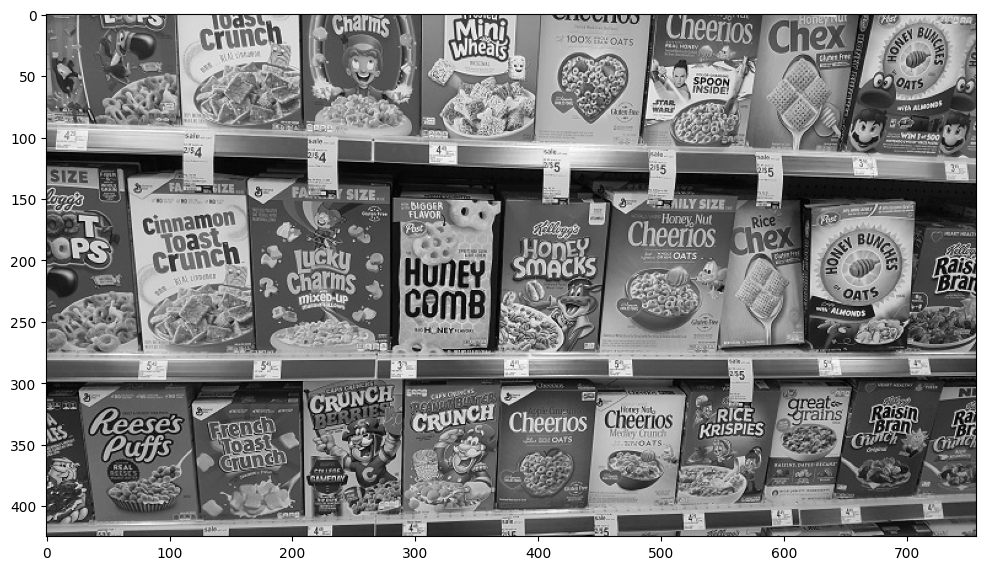

In [5]:
cereals = cv.imread('/content/drive/MyDrive/PCVK/Images/many_cereals.jpg',0)
display(cereals)

In [6]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [7]:
len(matches)

139

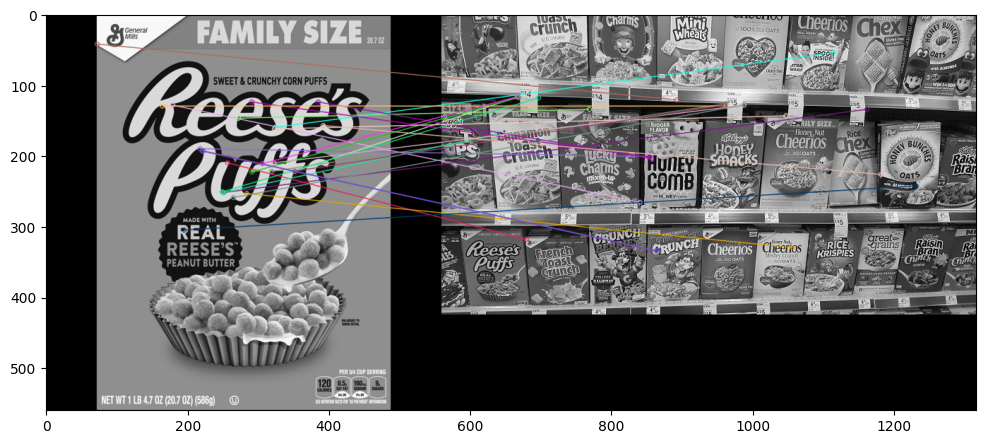

In [8]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [9]:
#!pip install opencv-contrib-python==4.4.0.44

In [10]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #description disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [11]:
len(matches)

1501

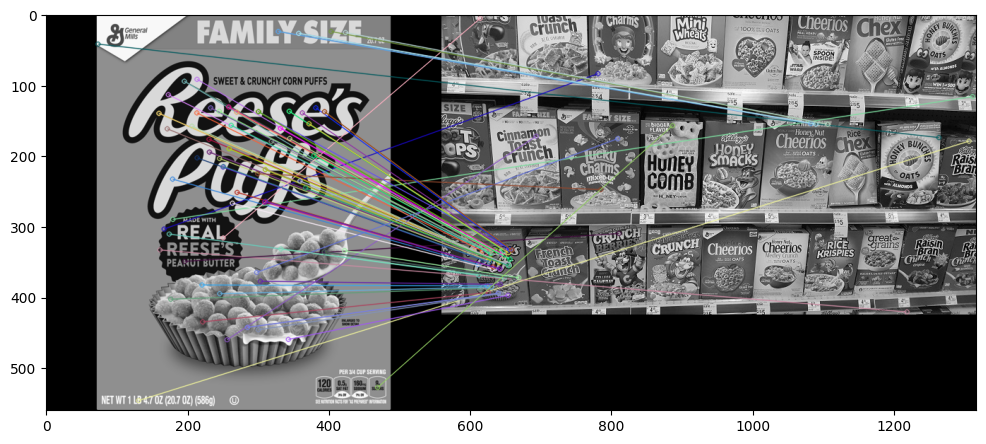

In [12]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

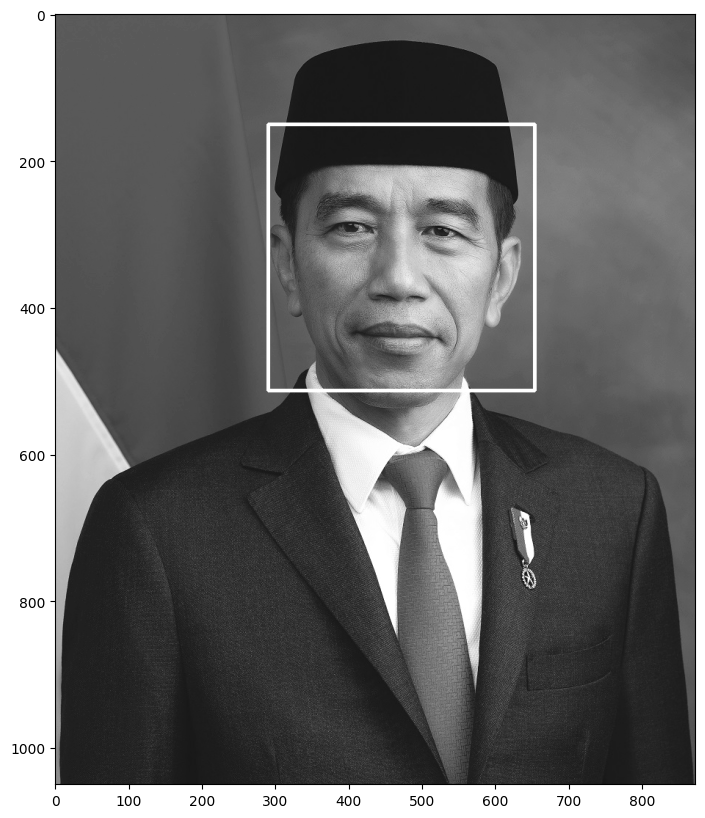

In [14]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/xtml/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/PCVK/Images/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi, (x,y), (x+w,y+h), (255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

## Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

2.

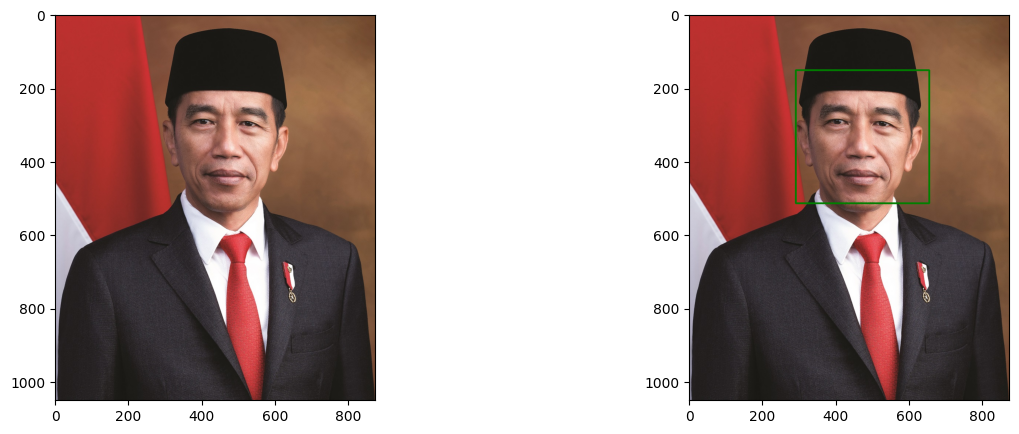

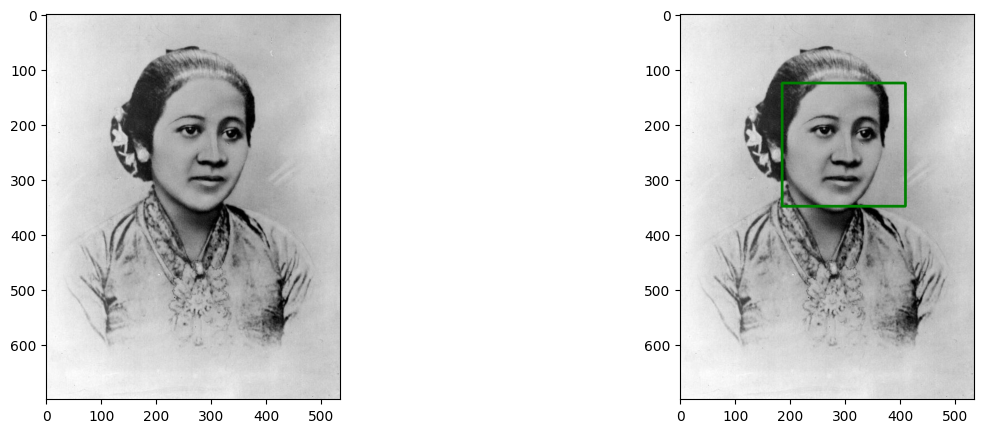

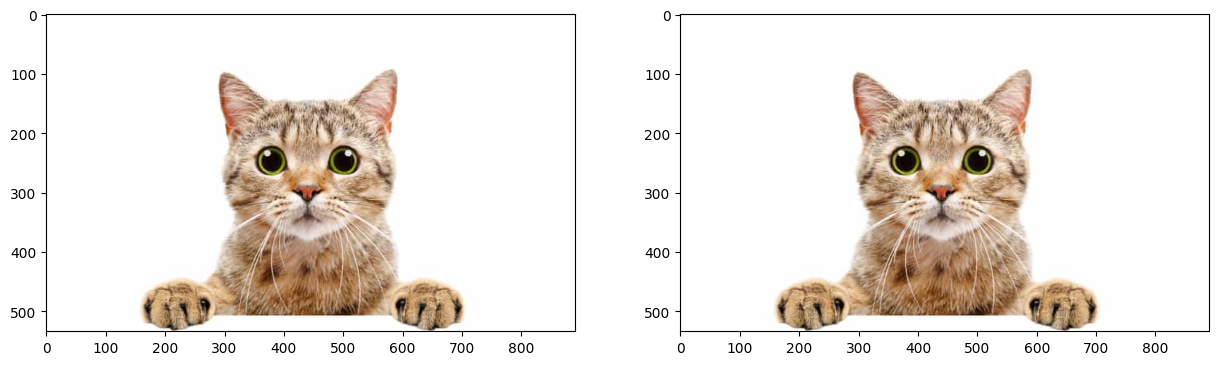

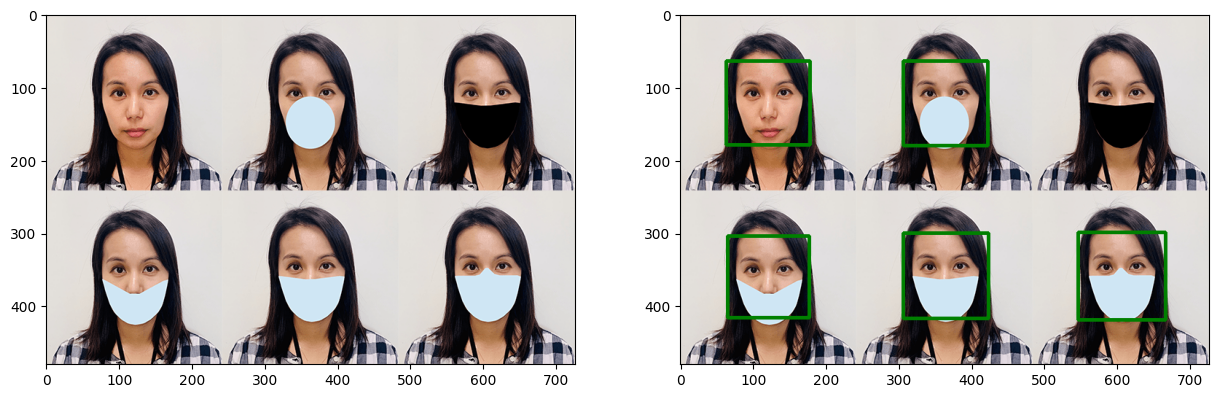

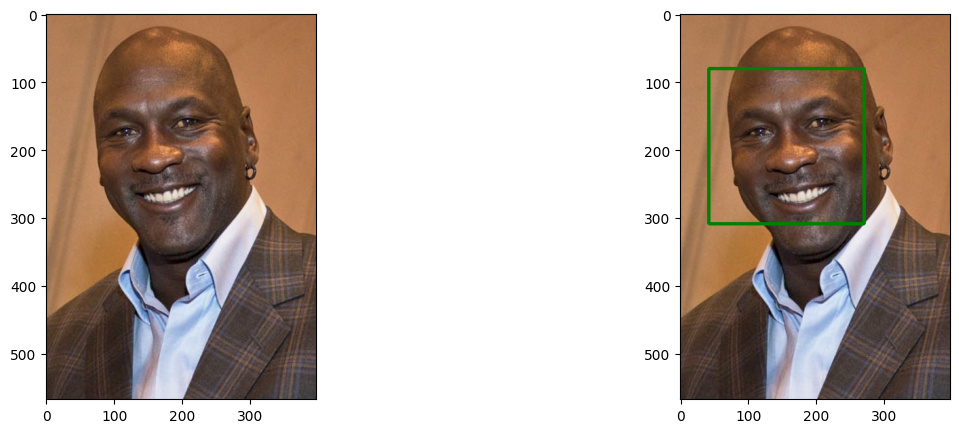

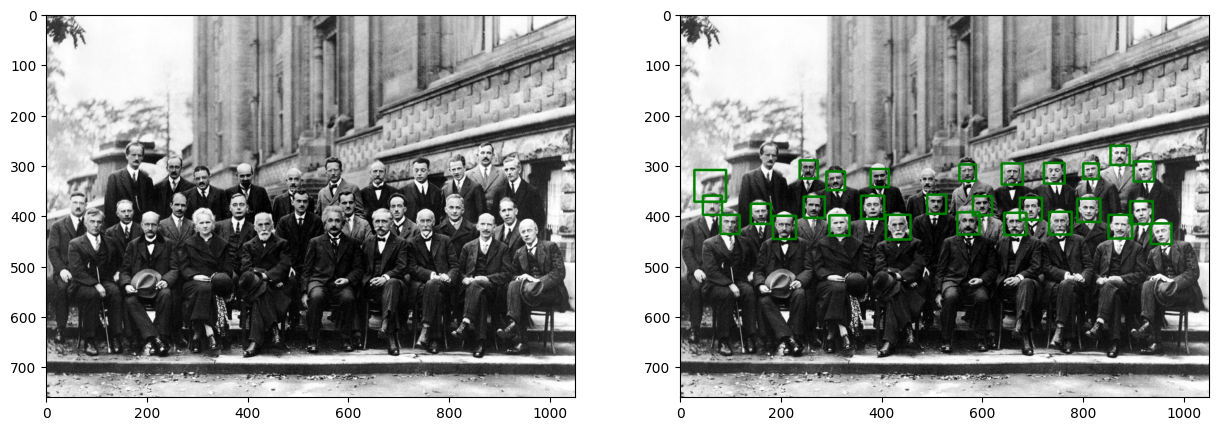

In [18]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/xtml/haarcascade_frontalface_alt.xml')
data = ['/content/drive/MyDrive/PCVK/Images/jokowi.jpg',
        '/content/drive/MyDrive/PCVK/Images/kartini.jpg',
        '/content/drive/MyDrive/PCVK/Images/kucing.jpg',
        '/content/drive/MyDrive/PCVK/Images/mask.png',
        '/content/drive/MyDrive/PCVK/Images/mjordan.jpg',
        '/content/drive/MyDrive/PCVK/Images/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()


3.

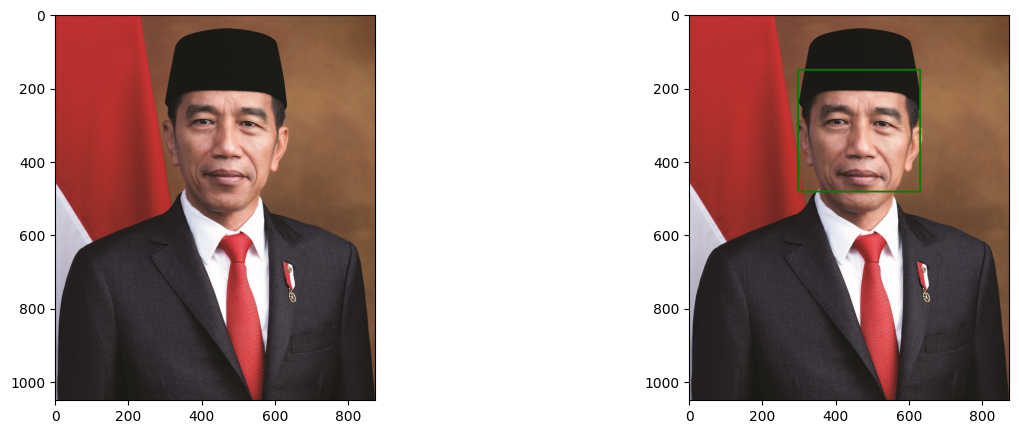

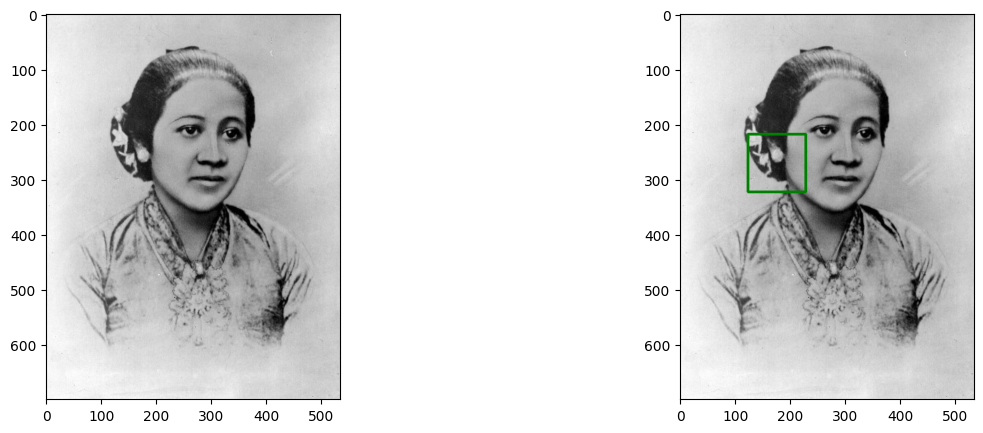

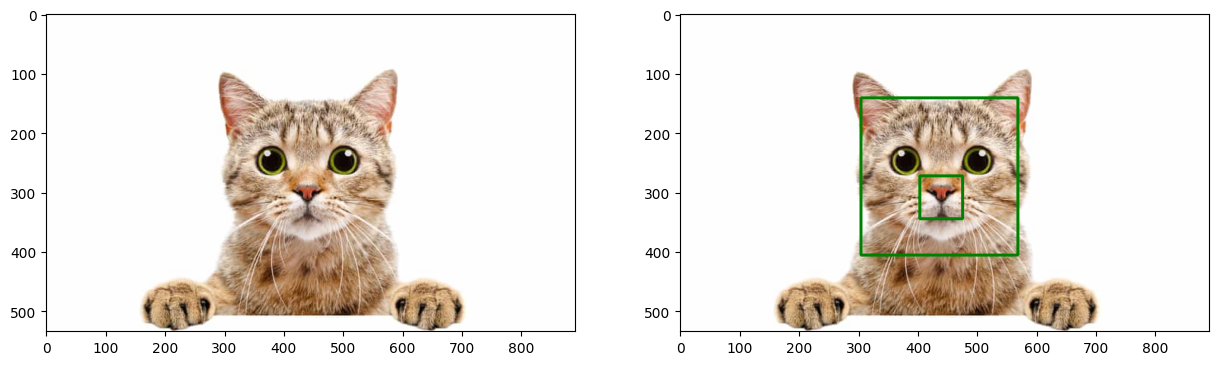

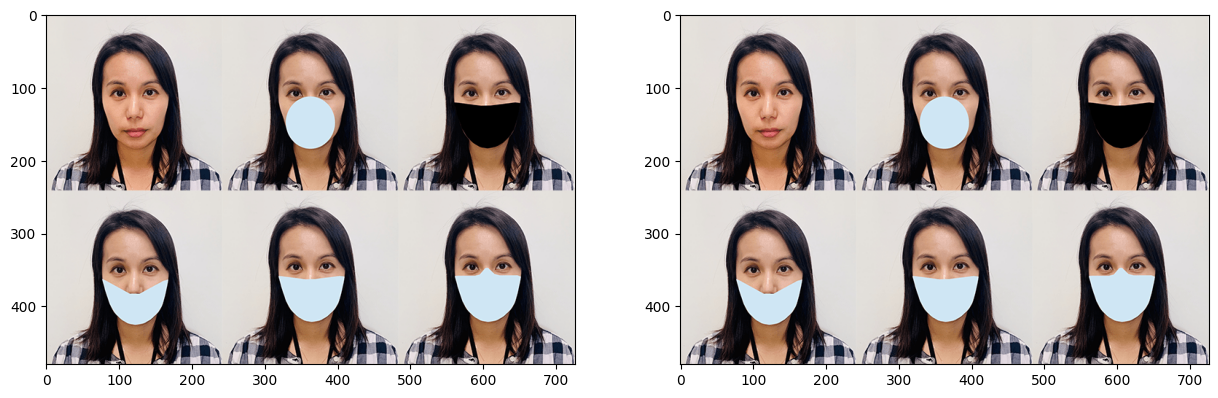

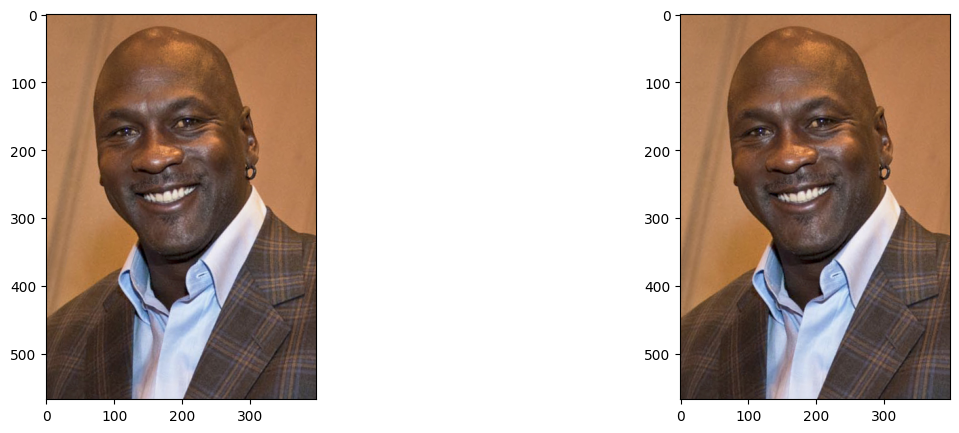

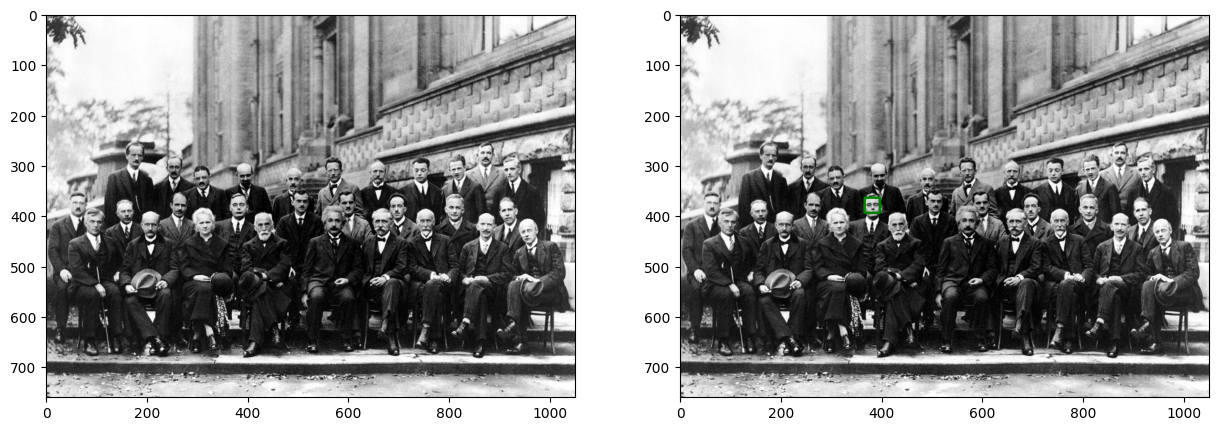

In [19]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/xtml/haarcascade_frontalcatface_extended.xml')
data = ['/content/drive/MyDrive/PCVK/Images/jokowi.jpg',
        '/content/drive/MyDrive/PCVK/Images/kartini.jpg',
        '/content/drive/MyDrive/PCVK/Images/kucing.jpg',
        '/content/drive/MyDrive/PCVK/Images/mask.png',
        '/content/drive/MyDrive/PCVK/Images/mjordan.jpg',
        '/content/drive/MyDrive/PCVK/Images/solvayconf.jpg'
        ]
for i in data:
  image = cv.imread(i)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,128,0),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()


4.

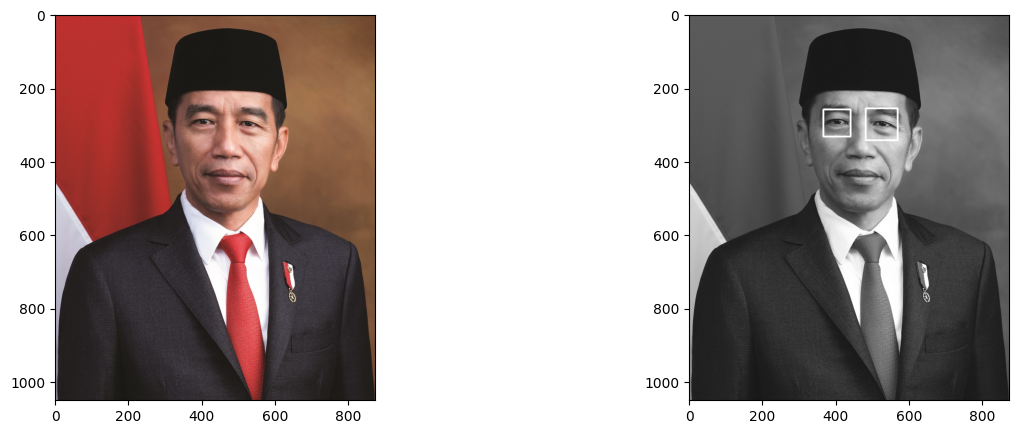

In [20]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/Images/xtml/haarcascade_eye.xml')
data = ['/content/drive/MyDrive/PCVK/Images/jokowi.jpg']

for i in data:
  image = cv.imread(i)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image_ori = cv.imread(i)
  roi_wajah = cascade_wajah.detectMultiScale(image)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(image,(x,y),(x+w,y+h),(255,255,255),3)
  f, axarr = plt. subplots(1,2,figsize=(15,5))
  plt.subplot(121),plt.imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  axarr[0].imshow(cv.cvtColor(image_ori, cv.COLOR_BGR2RGB))
  plt.subplot(122),plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

5.

In [21]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [22]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [23]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(720, 1280)
Saved to oliq.jpg


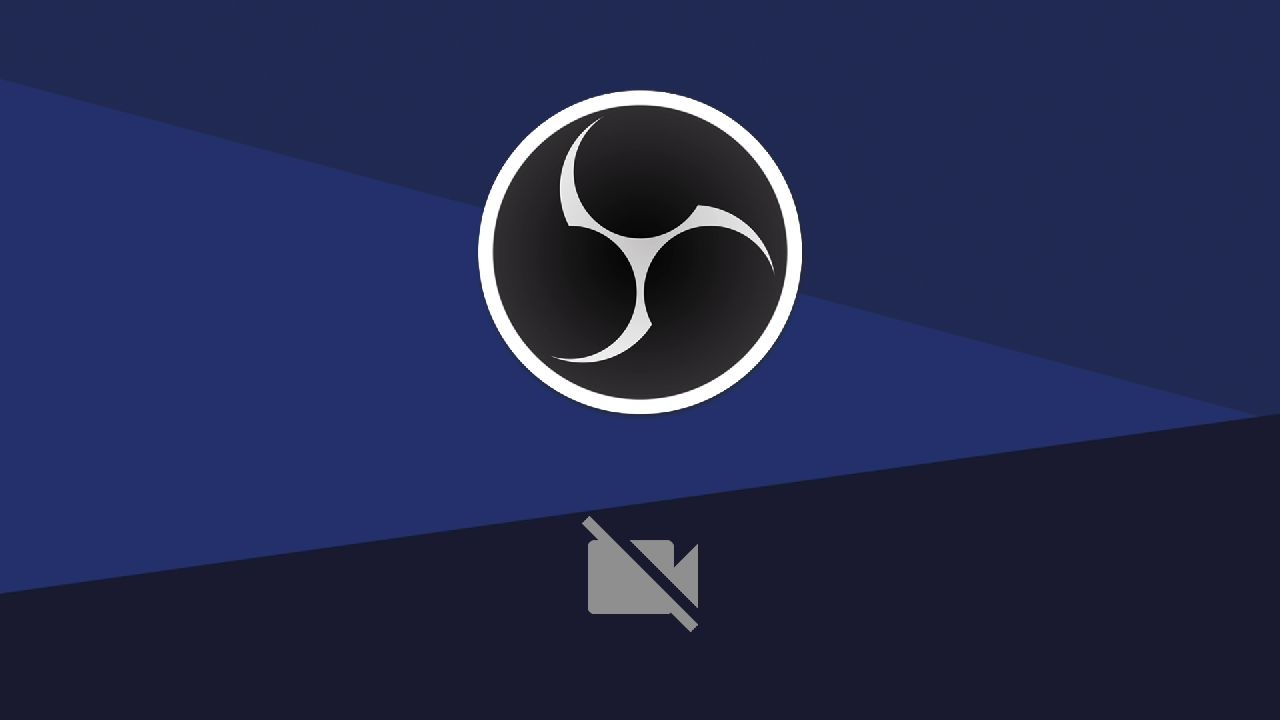

In [26]:
try:
  filename = take_photo('oliq.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


Dikarenakan pada laptop saya tidak terdapat kamera, maka dari itu tidak dapat mendeteksi kamera

6.

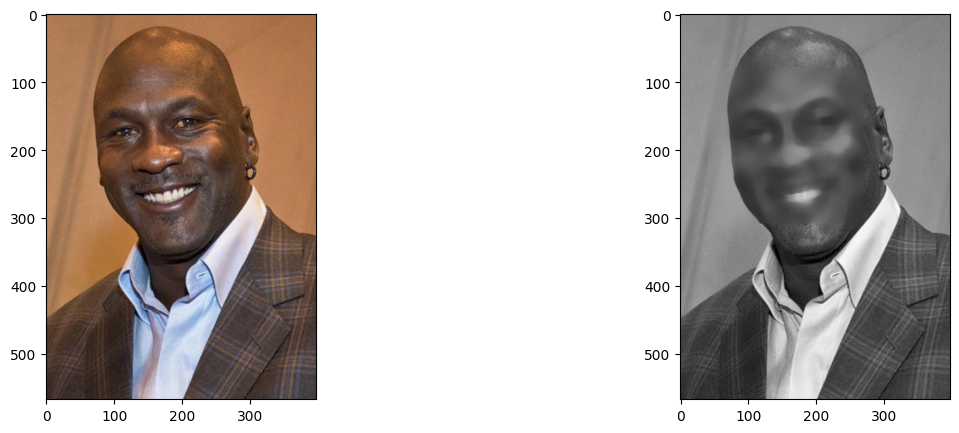

In [38]:
image_path = '/content/drive/MyDrive/PCVK/Images/mjordan.jpg'
cascade_path = '/content/drive/MyDrive/PCVK/Images/xtml/haarcascade_frontalface_alt.xml'

def overlay_faces(image_path, cascade_path):

    image = cv.imread(image_path)
    cascade = cv.CascadeClassifier(cascade_path)

    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        crop_image = image[y:y+h, x:x+w]
        image_blur = cv.medianBlur(crop_image, 19)
        overlay = cv.resize(image_blur, (w, h))
        image[y:y+h, x:x+w] = overlay[:, :, :3]

    # Display original and processed images
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB))
    axarr[1].imshow(cv.cvtColor(image, cv.COLOR_BGR2GRAY), cmap='gray')  # Convert to grayscale

overlay_faces(image_path, cascade_path)

7.

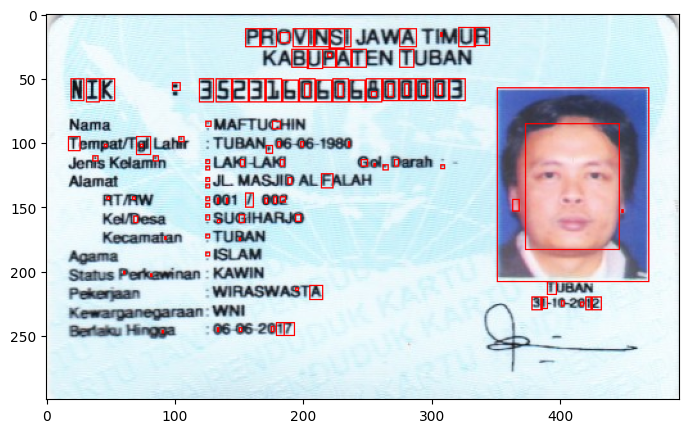

In [32]:
import cv2
from google.colab.patches import cv2_imshow

ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp4.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))


8.

In [33]:
ktp_crop = result[50:70,115:330]
cv2_imshow(ktp_crop)

In [ ]:
from tqdm import tqdm
import os
import tqdm
import cv2
import random
import numpy as np
import pickle


# Direktori data training
DATADIR = "p"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_ANYCOLOR)
      new_array = cv2.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      pass

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 3)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

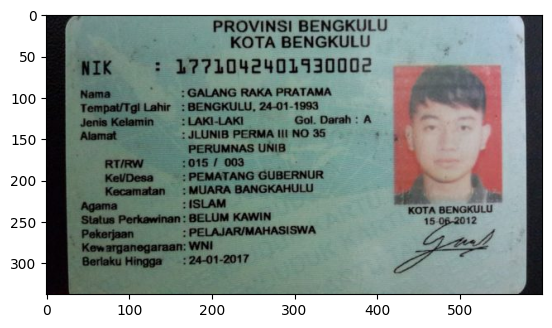

In [39]:
# Membaca gambar 'KTP7.jpeg'
ktp = cv2.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp1.png')

# Menampilkan gambar dengan mengubahnya dari BGR ke RGB
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 800x1200 with 0 Axes>

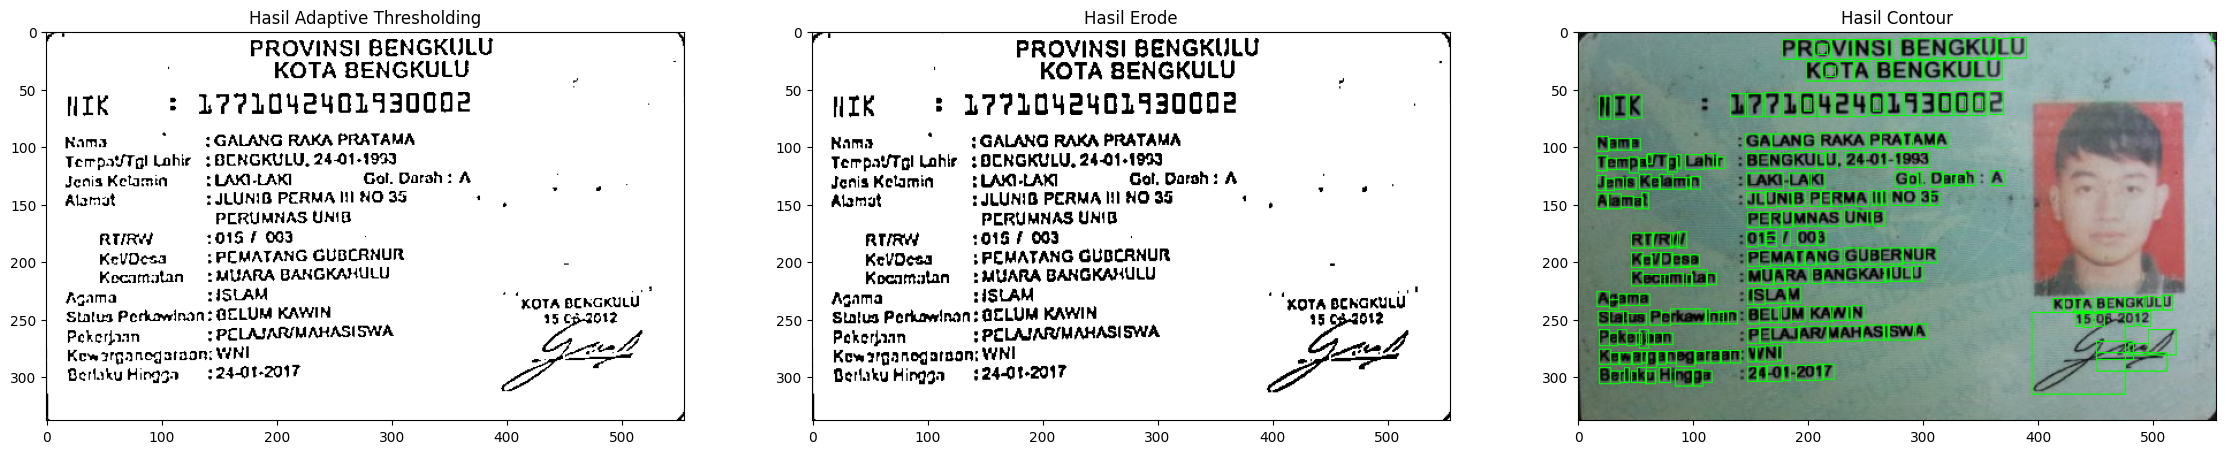

In [40]:
import cv2 as cv # Mengimpor modul cv2 dan memberinya alias cv
import cv2 # Mengimpor modul cv2
import numpy as np # Mengimpor modul numpy dan memberinya alias np
from matplotlib import pyplot as plt # Mengimpor pyplot dari modul matplotlib dan memberinya alias plt

from google.colab import drive # Mengimpor modul drive dari google.colab

drive.mount('/content/drive') # Mount Google Drive

# Membaca gambar dari direktori yang ditentukan
img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP_More/ktp1.png')
# Memotong gambar untuk menghilangkan bagian yang tidak perlu
img = img[:, 25:580]

plt.figure(figsize=(8, 12)) # Membuat figure dengan ukuran 8x12

# Mengaburkan gambar dengan Gaussian Blur
blurred_image = cv2.GaussianBlur(img, (3,3), 0)

# Mengubah gambar menjadi grayscale
img_gray = cv2.cvtColor(blurred_image, cv.COLOR_BGR2GRAY)
# Melakukan equalization pada gambar grayscale
equalized_image = cv2.equalizeHist(img_gray)

block_size = 11
constant = 15

# Melakukan adaptive thresholding pada gambar grayscale
thresholded_image = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, constant)

# Membuat kernel berukuran 2x1 untuk operasi morfologi
kernel = np.ones((2, 1), np.uint8)

# Melakukan operasi erosi pada gambar yang telah di threshold
morph_image = cv2.erode(thresholded_image,  kernel, iterations=1)

# Mencari kontur pada gambar
contours, hierarchy = cv.findContours(morph_image.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
for cnt in contours: # Untuk setiap kontur yang ditemukan
    x, y, w, h = cv.boundingRect(cnt) # Mendapatkan koordinat dan ukuran bounding box

    ras = format(w / h, '.2f') # Menghitung rasio antara lebar dan tinggi bounding box

    if h >= 8 and w >= 4 and float(ras) <= 4: # Jika tinggi >= 8, lebar >= 4, dan rasio <= 4

      # Membuat rectangle pada gambar asli dengan koordinat dan ukuran dari bounding box
      cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), thickness=1)

# Mengubah gambar menjadi RGB
contour_image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Mengubah gambar hasil erosi menjadi RGB
eroded_image = cv.cvtColor(morph_image, cv.COLOR_GRAY2RGB)
# Mengubah gambar hasil thresholding menjadi RGB
thresholded_image = cv.cvtColor(thresholded_image, cv.COLOR_GRAY2RGB)

fig, axs = plt.subplots(1, 3, figsize=(28, 10)) # Membuat subplot dengan 1 baris dan 3 kolom

axs[0].imshow(thresholded_image) # Menampilkan gambar hasil thresholding pada subplot pertama
axs[0].set_title('Hasil Adaptive Thresholding') # Memberikan judul pada subplot pertama

axs[1].imshow(eroded_image) # Menampilkan gambar hasil erosi pada subplot kedua
axs[1].set_title('Hasil Erode') # Memberikan judul pada subplot kedua

axs[2].imshow(contour_image) # Menampilkan gambar hasil deteksi kontur pada subplot ketiga
axs[2].set_title('Hasil Contour') # Memberikan judul pada subplot ketiga

plt.show() # Menampilkan semua subplot

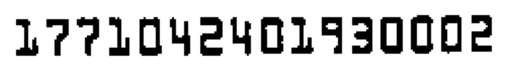

In [41]:
# Melakukan cropping pada gambar 'ktp' berdasarkan koordinat yang telah ditentukan
crop_img = eroded_image[50:80, 130:375]

# Menampilkan gambar hasil cropping
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [42]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (4,353 kB/s)
debconf: unable to init

In [44]:
# Mengimpor library yang diperlukan
import pytesseract
import imutils
import PIL

# Menggunakan gambar hasil cropping sebelumnya
img = crop_img

# # Mengubah gambar ke grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Melakukan thresholding pada gambar grayscale
# _, threshed = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Menggunakan pytesseract untuk mengenali teks pada gambar threshold
result = pytesseract.image_to_string(PIL.Image.fromarray(img), lang="ind")

# Menampilkan hasil pengenalan teks
print("NIK pada e-KTP:", result)

NIK pada e-KTP: 17?1042401930002

